In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tickers = ['DIA', 'IWM', 'QQQ', 'SPY', 'VTI']

In [3]:
data = yf.download(tickers, period='1y')['Adj Close']

[*********************100%***********************]  5 of 5 completed


In [4]:
periods = {'1 week':5, '1 Month':30, '3 Months':90, '6 Months':180, '1 Year':250}
# create a data frame with tickers as the index and periods.keys() as the columns
returns_df = pd.DataFrame(index=tickers, columns=periods.keys())

for period, days in periods.items():
    returns = ((data.iloc[-1] - data.iloc[-days]) / data.iloc[-days]) * 100
    returns_df[period] = returns

In [64]:
for period in periods.keys():

    table = returns_df.round(2).sort_values(by=f'{period}', ascending=False)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    bar_container = ax.barh(table.index, table[period].astype(float), color='#f5deb3')
    ax.set(ylabel='percent return', title=f'Stock Market Returns - {period}', xlim=(table[period].min()-1, table[period].max() + 1))
    ax.bar_label(
        bar_container, fmt='%.2f', label_type='edge', color='#f5deb3'
    )
    ax.set_facecolor('black')
    fig.set_facecolor('black')
    # Make axis and data labels white
    ax.tick_params(axis='x', colors='#f5deb3')
    ax.tick_params(axis='y', colors='#f5deb3')
    ax.title.set_color('#f5deb3')
    ax.yaxis.label.set_color('#f5deb3')

    plt.savefig(f'performance_table_{period}.png', facecolor=fig.get_facecolor())
    plt.close()

In [7]:
table

,1 week,1 Month,3 Months,6 Months,1 Year
QQQ,2.97%,5.86%,21.43%,13.04%,15.54%
SPY,1.36%,2.2%,6.24%,6.93%,7.25%
VTI,1.27%,1.98%,5.19%,5.91%,6.34%
IWM,0.73%,0.2%,-3.28%,-1.66%,0.42%
DIA,0.34%,-0.26%,-0.86%,7.04%,6.94%


AttributeError: 'BarContainer' object has no attribute 'set_facecolor'

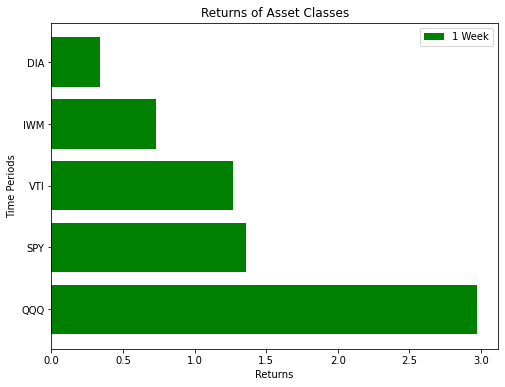

In [5]:
table = returns_df.round(2).sort_values(by='1 week', ascending=False)

# Create the area plot
plt.figure(figsize=(8, 6))
ax = plt.barh(table.index, table['1 week'], color='green', label='1 Week')

# Customize the plot
plt.title('Returns of Asset Classes')
plt.xlabel('Returns')
plt.ylabel('Time Periods')

# Create custom legend with colors
plt.legend(loc='upper right')
# Set the background color to black
ax.set_facecolor('black')

# Set the color of the tick labels and axes
ax.tick_params(colors='white')
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')

# Save the plot as a PNG image
plt.savefig('barplot.jpg', bbox_inches='tight', facecolor='black')
plt.close()

# Save the table as an image
plt.figure(figsize=(8, 6))
plt.axis('off')
plt.table(cellText=table.values,
          colLabels=table.columns,
          rowLabels=table.index,
          loc='center',
          cellLoc='center',
          colWidths=[0.2]*len(table.columns),
          bbox=[0, 0, 1, 1])
plt.savefig('stock_performance.png', bbox_inches='tight')
plt.close()

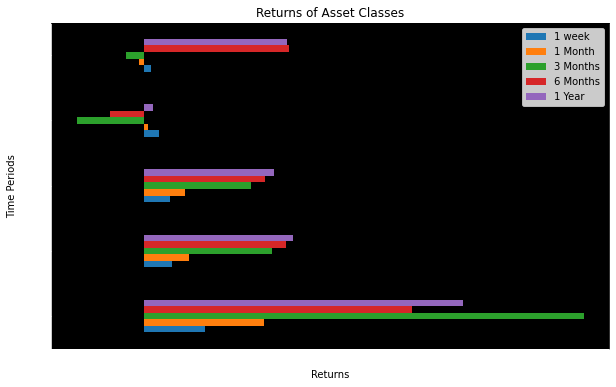

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with returns for 5 asset classes as columns
df=table
# Create a horizontal bar chart
ax = df.plot(kind='barh', figsize=(10, 6))

# Customize the plot
plt.title('Returns of Asset Classes')
plt.xlabel('Returns')
plt.ylabel('Time Periods')

# Set the background color to black
ax.set_facecolor('black')

# Set the color of the tick labels and axes
ax.tick_params(colors='white')
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')

# Save the plot as a PNG image
plt.savefig('../images/barplot.jpg', bbox_inches='tight', facecolor='black')

# Show the plot
plt.show()
